# Data Exploration and Transformation

In [28]:
import pandas
import numpy
import matplotlib
import seaborn
import re
import json

In [29]:
df = pandas.read_csv('/content/train.csv')
df

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN
...,...,...,...,...,...,...,...
42345,36691,109465,The probability of an event occurring is \( 0....,Unlikely,very unlikely.,False_Neither,NaN
42346,36692,109465,The probability of an event occurring is \( 0....,Unlikely,yea pretty much unlikely from what it seems.,False_Neither,NaN
42347,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NaN
42348,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42350 entries, 0 to 42349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              42350 non-null  int64 
 1   QuestionId          42350 non-null  int64 
 2   QuestionText        42350 non-null  object
 3   MC_Answer           42350 non-null  object
 4   StudentExplanation  42349 non-null  object
 5   Category            42349 non-null  object
 6   Misconception       10965 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.3+ MB


In [31]:
for col in df.columns:#.drop(['row_id','QuestionId','StudentExplanation']):
  print(f"Unique values for column '{col}': {df[col].unique()}")

Unique values for column 'row_id': [    0     1     2 ... 36693 36694 36695]
Unique values for column 'QuestionId': [ 31772  31774  31777  31778  32829  32833  32835  33471  33472  33474
  76870  89443  91695 104665 109465]
Unique values for column 'QuestionText': ['What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]'
 'Calculate \\( \\frac{1}{2} \\div 6 \\)'
 'A box contains \\( 120 \\) counters. The counters are red or blue. \\( \\frac{3}{5} \\) of the counters are red.\nHow many red counters are there?'
 '\\( \\frac{A}{10}=\\frac{9}{15} \\) What is the value of \\( A \\) ?'
 '\\( 2 y=24 \\) What is the value of \\( y \\) ?'
 'Calculate \\( \\frac{2}{3} \\times 5 \\)'
 'Which number is the greatest?'
 'A bag contains \\( 24 \\) yellow and green balls. \\( \\frac{3}{8} \\) of the balls are yellow. How many of the balls are green?'
 '\\( \\frac{1}{3}+\\frac{2}{5}= \\)'
 'Sally h

In [32]:
# prompt: give me code to show sum of uniques value for each column

for col in df[['Misconception','Category', 'MC_Answer']]:
  print(f"Sum of unique values for column '{col}': {df[col].value_counts()}")

Sum of unique values for column 'Misconception': Misconception
Incomplete                                1473
Additive                                   929
Wrong_fraction                             836
Duplication                                704
Denominator-only_change                    672
Subtraction                                620
Adding_across                              614
Positive                                   566
Wrong_term                                 558
Irrelevant                                 497
Inversion                                  414
Mult                                       353
Whole_numbers_larger                       329
WNB                                        299
Tacking                                    290
Unknowable                                 282
Wrong_Fraction                             273
SwapDividend                               206
Scale                                      179
Not_variable                               1

In [33]:
def latex_to_plain(latex_string):
    text = re.sub(r"\\\(|\\\)", '', latex_string)
    # Tangani pecahan \frac{a}{b} → a/b
    text = re.sub(r"\\frac{([^{}]+)}{([^{}]+)}", r"\1/\2", text)
    text = text.replace("\\times", "*")
    text = text.replace("\\div", "÷")
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [34]:
# Ambil data training
df_train = df[~df['Category'].isna()].copy()

# Bersihkan latex
df_train["QuestionText_clean"] = df_train["QuestionText"].apply(latex_to_plain)
df_train["MC_Answer_clean"] = df_train["MC_Answer"].apply(latex_to_plain)

In [35]:
# Gabungkan input untuk LLM
df_train["input"] = (
    "Question: " + df_train["QuestionText_clean"] + "\n" +
    "Answer: " + df_train["MC_Answer_clean"] + "\n" +
    "Explanation: " + df_train["StudentExplanation"]
)


In [42]:
df_train["Misconception"] = df_train["Misconception"].fillna("NA")

In [43]:
# Output
df_train["output"] = df_train["Category"] + ":" + df_train["Misconception"]

In [45]:
category_list = df_train["Category"].unique()
miscon_list = df_train["Misconception"].unique()

cat_string = ', '.join(category_list)
misc_string = ', '.join(miscon_list)

'NA, Incomplete, WNB, SwapDividend, Mult, FlipChange, Irrelevant, Wrong_Fraction, Additive, Not_variable, Adding_terms, Inverse_operation, Inversion, Duplication, Wrong_Operation, Whole_numbers_larger, Longer_is_bigger, Ignores_zeroes, Shorter_is_bigger, Wrong_fraction, Adding_across, Denominator-only_change, Incorrect_equivalent_fraction_addition, Division, Subtraction, Unknowable, Definition, Interior, Positive, Tacking, Wrong_term, Firstterm, Base_rate, Multiplying_by_4, Certainty, Scale'

In [46]:
# Format instruction-style
df_train["instruction"] = f"Given the math question, student answer, and their explanation, determine if there is a misconception and classify it.\nValid categories: {cat_string}\nValid misconceptions (only when applicable): {misc_string}\nFormat your answer as: Category[:Misconception]"

In [48]:
def clean_text(text):
    # Hilangkan emoji
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Ubah smart quotes jadi standar
    text = text.replace('“', '"').replace('”', '"').replace('’', "'")

    # Normalisasi pecahan vertikal seperti:
    # 3\n_\n9 → 3/9
    text = re.sub(r"\n?\s*(\d+)\s*\n[_‐-]+\n\s*(\d+)", r"\1/\2", text)

    # Ganti garis pembagian panjang (misal 5|120) → "120 ÷ 5"
    text = re.sub(r"(\d+)\s*\|\s*(\d+)", r"\2 ÷ \1", text)

    # Ganti \ atau \\ menjadi / hanya jika di antara angka
    text = re.sub(r"(?<=\d)\\+(?=\d)", "/", text)

    text = text.replace("\\", "")

    return text

df_train["input"] = df_train["input"].apply(clean_text)
df_train["output"] = df_train["output"].apply(clean_text)


In [49]:
df_train

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception,QuestionText_clean,MC_Answer_clean,input,output,instruction
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NA,What fraction of the shape is not shaded? Give...,1/3,Question: What fraction of the shape is not sh...,True_Correct:NA,"Given the math question, student answer, and t..."
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NA,What fraction of the shape is not shaded? Give...,1/3,Question: What fraction of the shape is not sh...,True_Correct:NA,"Given the math question, student answer, and t..."
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NA,What fraction of the shape is not shaded? Give...,1/3,Question: What fraction of the shape is not sh...,True_Neither:NA,"Given the math question, student answer, and t..."
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NA,What fraction of the shape is not shaded? Give...,1/3,Question: What fraction of the shape is not sh...,True_Neither:NA,"Given the math question, student answer, and t..."
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NA,What fraction of the shape is not shaded? Give...,1/3,Question: What fraction of the shape is not sh...,True_Correct:NA,"Given the math question, student answer, and t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
42345,36691,109465,The probability of an event occurring is \( 0....,Unlikely,very unlikely.,False_Neither,NA,The probability of an event occurring is 0.9 ....,Unlikely,Question: The probability of an event occurrin...,False_Neither:NA,"Given the math question, student answer, and t..."
42346,36692,109465,The probability of an event occurring is \( 0....,Unlikely,yea pretty much unlikely from what it seems.,False_Neither,NA,The probability of an event occurring is 0.9 ....,Unlikely,Question: The probability of an event occurrin...,False_Neither:NA,"Given the math question, student answer, and t..."
42347,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NA,The probability of an event occurring is 0.9 ....,Unlikely,Question: The probability of an event occurrin...,False_Neither:NA,"Given the math question, student answer, and t..."
42348,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NA,The probability of an event occurring is 0.9 ....,Unlikely,Question: The probability of an event occurrin...,False_Neither:NA,"Given the math question, student answer, and t..."


In [50]:
with open("train_finetune.jsonl", "w", encoding="utf-8") as f:
    for _, row in df_train.iterrows():
        json.dump({
            "instruction": row["instruction"],
            "input": row["input"],
            "output": row["output"]
        }, f)
        f.write("\n")

# Setup LLM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install -q -U bitsandbytes
!pip3 install -q -U peft
!pip3 install -q -U trl
!pip3 install -q -U accelerate
!pip3 install -q -U datasets
!pip3 install -q -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
import transformers
import torch
from google.colab import userdata
from datasets import load_dataset
from trl import SFTTrainer
from peft import LoraConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig, GemmaTokenizer
from datasets import load_dataset, DatasetDict
from transformers import DataCollatorForLanguageModeling
import wandb
from peft import PeftModel



In [76]:
import os
import transformers
import torch
import datasets
import trl
import peft
import wandb
import sys

# Versi-versi library
print("Python:", sys.version)
print("Transformers:", transformers.__version__)
print("PyTorch:", torch.__version__)
print("Datasets:", datasets.__version__)
print("TRL (SFTTrainer):", trl.__version__)
print("PEFT:", peft.__version__)
print("WandB:", wandb.__version__)

Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Transformers: 4.53.2
PyTorch: 2.6.0+cu124
Datasets: 4.0.0
TRL (SFTTrainer): 0.19.1
PEFT: 0.16.0
WandB: 0.21.0


In [5]:
from huggingface_hub import login
login()  # ← Masukkan token HF kamu saat diminta

In [53]:
model_id = "google/gemma-2b"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

In [4]:
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [54]:
tokenizer = AutoTokenizer.from_pretrained(model_id, token=os.environ['HF_TOKEN'], trust_remote_code=True)
tokenizer.padding_side = "right"  # default untuk GPT-style model

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             quantization_config=bnb_config,
                                             device_map={"":0},
                                             token=os.environ['HF_TOKEN'])

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [55]:
def print_model_size_in_mb_gb(model):
    """
    Verilen PyTorch modelinin (parametreler ve buffer'lar dahil)
    toplam boyutunu MB ve GB cinsinden ekrana yazdırır.
    """
    param_size = 0
    for param in model.parameters():
        param_size += param.numel() * param.element_size()

    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.numel() * buffer.element_size()

    size_bytes = param_size + buffer_size
    size_mb = size_bytes / (1024**2)
    size_gb = size_mb / 1024

    print(f"Ukuran model: {size_mb:.2f} MB ({size_gb:.2f} GB)")

print_model_size_in_mb_gb(model)

Ukuran model: 1945.15 MB (1.90 GB)


In [56]:
os.environ["WANDB_DISABLED"] = "false"

In [57]:
lora_config = LoraConfig(
    r = 8,
    lora_alpha = 16,
    target_modules = ["q_proj", "o_proj", "k_proj", "v_proj",
                      "gate_proj", "up_proj", "down_proj"],
    lora_dropout = 0.05, # untuk overfitting saja
    task_type = "CAUSAL_LM",
)

In [58]:
def formatting_func(example):
    return f"{example['instruction']}\n{example['input']}\n### Answer:\n{example['output']}"

In [59]:
data = load_dataset("json", data_files="/content/train_finetune.jsonl")

split_dataset = data["train"].train_test_split(test_size=0.2, seed=42)
data = DatasetDict({
    "train": split_dataset["train"],
    "validation": split_dataset["test"]
})

def tokenize_fn(example):
    text = formatting_func(example)
    return tokenizer(text, truncation=True, padding=False)

data = data.map(tokenize_fn, batched=False)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/33879 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/8470 [00:00<?, ? examples/s]

In [60]:
data

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'input_ids', 'attention_mask'],
        num_rows: 33879
    })
    validation: Dataset({
        features: ['instruction', 'input', 'output', 'input_ids', 'attention_mask'],
        num_rows: 8470
    })
})

In [61]:
os.environ["WANDB"] = userdata.get('WANDB')

In [62]:
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [63]:

wandb.init(
    project="finetune-gemma-math-add-patter-answer",
    name="gemma-lora-v1",
    notes="Fine-tuning Gemma 2B with LoRA on student misconception dataset and add patter answer to make the output more structured"
)


eval/loss,█▅▄▃▃▂▂▂▂▁▁▁
eval/mean_token_accuracy,▁▄▄▅▆▆▇▇▇███
eval/num_tokens,▁▂▂▃▄▄▅▅▆▇▇█
eval/runtime,▁▁▄▇▇▆█▇▆▇█▇
eval/samples_per_second,██▅▂▂▃▂▂▃▂▁▂
eval/steps_per_second,██▅▂▂▃▂▂▃▂▁▂
train/epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇███
train/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇█████
train/grad_norm,▇█▆▃▃▃▂▃▃▂▃▂▃▂▃▂▃▂▁▂▂▁▂▂▃▃▂▂▄▁▂▃▃▂▂▂▂▂▂▂
train/learning_rate,▄████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,█▅▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [65]:
trainer = SFTTrainer(
    model=model,
    train_dataset=data["train"],
    eval_dataset=data["validation"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        gradient_accumulation_steps=4,
        gradient_checkpointing=True,
        warmup_steps=20,
        max_steps=900,
        # num_train_epochs=1,
        learning_rate=2e-4,
        fp16=False,
        bf16=True,
        weight_decay=0.01,
        logging_steps=10,
        save_steps=100,
        eval_steps=50,
        save_strategy="steps",
        eval_strategy="steps",
        output_dir="third_outputs",
        save_total_limit=2,
        optim="paged_adamw_8bit", # Optimizer yang digunakan (adamw_torch adalah versi efisien dari AdamW)
        report_to="wandb"
    ),
    peft_config=lora_config,
    formatting_func=formatting_func,
)

/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:661: UserWarning: You passed a dataset that is already processed (contains an `input_ids` field) together with a formatting function. Therefore `formatting_func` will be ignored. Either remove the `formatting_func` or pass a dataset that is not already processed.
  warnings.warn(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, la

In [66]:
trainer.train()

Step,Training Loss,Validation Loss
50,0.246300,0.224491
100,0.197900,0.189797
150,0.200900,0.181779
200,0.161200,0.178368
250,0.177500,0.175583
300,0.175200,0.173782
350,0.166100,0.172082
400,0.173600,0.169604
450,0.170400,0.168290


Step,Training Loss,Validation Loss
50,0.246300,0.224491
100,0.197900,0.189797
150,0.200900,0.181779
200,0.161200,0.178368
250,0.177500,0.175583
300,0.175200,0.173782
350,0.166100,0.172082
400,0.173600,0.169604
450,0.170400,0.168290
500,0.179500,0.166664


TrainOutput(global_step=900, training_loss=0.23611737185054354, metrics={'train_runtime': 15209.1071, 'train_samples_per_second': 0.473, 'train_steps_per_second': 0.059, 'total_flos': 2.458055663161344e+16, 'train_loss': 0.23611737185054354})

In [67]:
!cp -r /content/third_outputs /content/drive/MyDrive/Colab-Notebooks/generative-ai/math_compe
!cp -r /content/wandb /content/drive/MyDrive/Colab-Notebooks/generative-ai/math_compe/third_outputs


In [68]:
model.eval()
tokenizer.pad_token = tokenizer.eos_token
# Hindari error saat batching/generate

In [75]:
text = "instruction : Given the math question, student answer, and their explanation, determine if there is a misconception and classify it.\nValid categories: True_Correct, True_Neither, True_Misconception, False_Neither, False_Misconception, False_Correct\nValid misconceptions (only when applicable): NA, Incomplete, WNB, SwapDividend, Mult, FlipChange, Irrelevant, Wrong_Fraction, Additive, Not_variable, Adding_terms, Inverse_operation, Inversion, Duplication, Wrong_Operation, Whole_numbers_larger, Longer_is_bigger, Ignores_zeroes, Shorter_is_bigger, Wrong_fraction, Adding_across, Denominator-only_change, Incorrect_equivalent_fraction_addition, Division, Subtraction, Unknowable, Definition, Interior, Positive, Tacking, Wrong_term, Firstterm, Base_rate, Multiplying_by_4, Certainty, Scale\nFormat your answer as: Category[:Misconception], input: Question: Calculate 1/2  6\nAnswer: 1/3\nExplanation: if you divide 1/2 by 6 you get 6/3 because 2 goes into 6 3 times and 1 goes into 6 six times . that is a top heavy fraction so you  simplify it to 2/3. and then simplify again to 1/3"
device = "cuda:0"
inputs = tokenizer(text, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

instruction : Given the math question, student answer, and their explanation, determine if there is a misconception and classify it.
Valid categories: True_Correct, True_Neither, True_Misconception, False_Neither, False_Misconception, False_Correct
Valid misconceptions (only when applicable): NA, Incomplete, WNB, SwapDividend, Mult, FlipChange, Irrelevant, Wrong_Fraction, Additive, Not_variable, Adding_terms, Inverse_operation, Inversion, Duplication, Wrong_Operation, Whole_numbers_larger, Longer_is_bigger, Ignores_zeroes, Shorter_is_bigger, Wrong_fraction, Adding_across, Denominator-only_change, Incorrect_equivalent_fraction_addition, Division, Subtraction, Unknowable, Definition, Interior, Positive, Tacking, Wrong_term, Firstterm, Base_rate, Multiplying_by_4, Certainty, Scale
Format your answer as: Category[:Misconception], input: Question: Calculate 1/2  6
Answer: 1/3
Explanation: if you divide 1/2 by 6 you get 6/3 because 2 goes into 6 3 times and 1 goes into 6 six times . that is 

# Model Evaluation Visualization

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Login ke wandb terlebih dahulu (jika belum)
# wandb.login()

# Ganti dengan username dan run ID kamu
api = wandb.Api()
run = api.run("fikryyoshiko70-dicoding/finetune-gemma-math-add-patter-answer/runs/8bpd13ur")

# Ambil log history
history = run.history(pandas=True)


In [88]:
print(history.columns)


Index(['_step', 'train/mean_token_accuracy', 'train/num_tokens', '_runtime',
       'train/loss', 'train/grad_norm', 'train/learning_rate', 'train/epoch',
       '_timestamp', 'train/global_step', 'eval/loss', 'eval/num_tokens',
       'eval/steps_per_second', 'eval/samples_per_second',
       'eval/mean_token_accuracy', 'eval/runtime'],
      dtype='object')


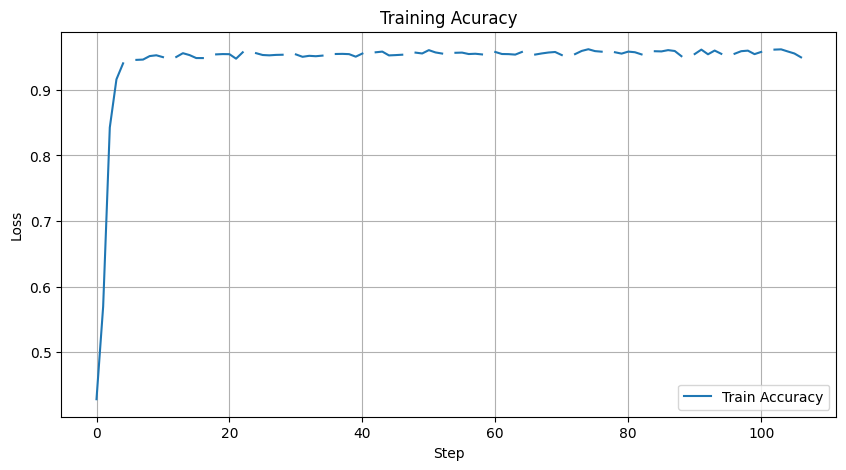

In [87]:

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history['_step'], history['train/mean_token_accuracy'], label="Train Accuracy")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Acuracy")
plt.legend()
plt.grid()
plt.show()

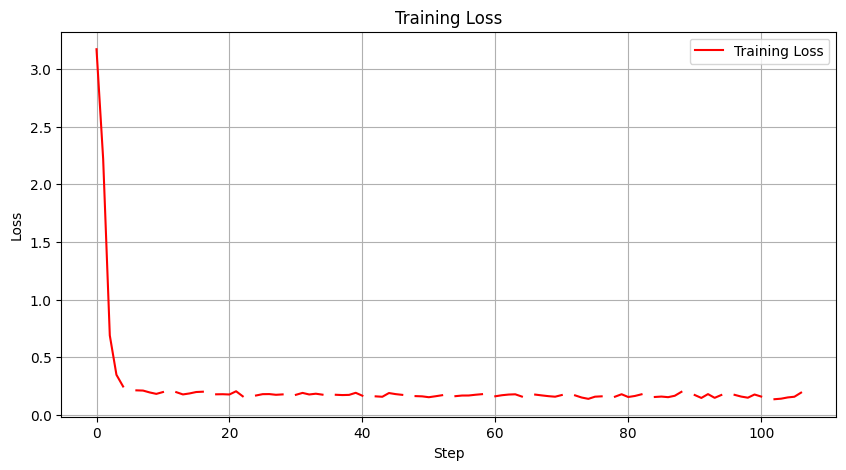

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(history['_step'], history['train/loss'], label="Training Loss", color='red')
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [90]:
print(history['eval/mean_token_accuracy'].dropna().head(10))
print("Jumlah non-NaN:", history['eval/mean_token_accuracy'].notna().sum())


5     0.944721
11    0.950248
17    0.952891
23    0.953462
29    0.953870
35    0.954267
41    0.954771
47    0.955403
53    0.955971
59    0.956318
Name: eval/mean_token_accuracy, dtype: float64
Jumlah non-NaN: 18


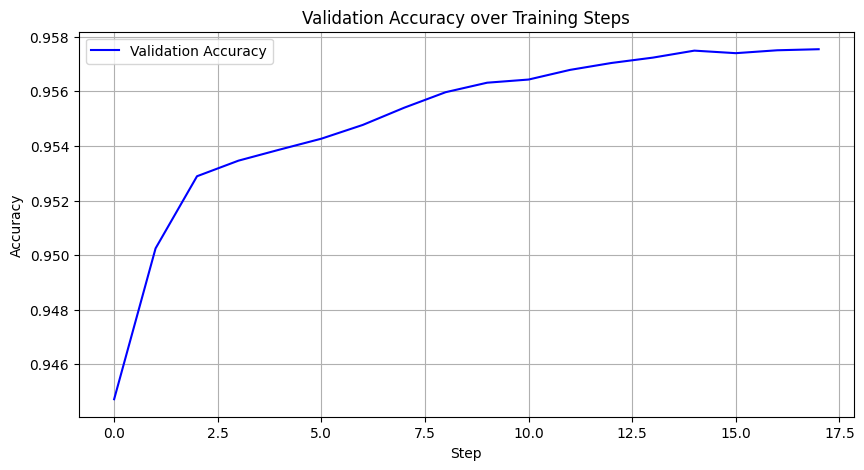

In [106]:
history_cleaned = history.dropna(subset=['eval/mean_token_accuracy'])
print(history_cleaned['eval/mean_token_accuracy'].head(10))
print("Jumlah non-NaN setelah dropna:", history_cleaned['eval/mean_token_accuracy'].notna().sum())


history_cleaned = history.dropna(subset=['eval/mean_token_accuracy'])

history_cleaned['eval/mean_token_accuracy'].reset_index(drop=True, inplace=True)

# Plot mean token accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(len(history_cleaned['eval/mean_token_accuracy'])), history_cleaned['eval/mean_token_accuracy'], label="Validation Accuracy", color='blue')
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy over Training Steps")
plt.legend()
plt.grid(True)
plt.show()